Construindo um modelo que seja capaz de prever a taxa média de ocupação por proprietários de casas na região de Boston (EUA).

Variável target: Valor numérico que representa a mediana da taxa de ocupação (em $1000s)

Dataset: https://www.kaggle.com/competitions/boston-housing

<img src="https://cdn.vox-cdn.com/thumbor/ytWQXLrdk_BlB8dVhImYurfR3NY=/0x0:5854x3903/1200x675/filters:focal(2459x1484:3395x2420)/cdn.vox-cdn.com/uploads/chorus_image/image/63307699/shutterstock_1524900662.15.jpg">

---

<h3>Data description</h3>

The Boston data frame has 506 rows and 14 columns.

This data frame contains the following columns:

*crim*
  * per capita crime rate by town.

*zn*
  * proportion of residential land zoned for lots over 25,000 sq.ft.

*indus*
  * proportion of non-retail business acres per town.

*chas*
  * Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

*nox*
  * nitrogen oxides concentration (parts per 10 million).

*rm*
  * average number of rooms per dwelling.

*age*
  * proportion of owner-occupied units built prior to 1940.

*dis*
  * weighted mean of distances to five Boston employment centres.

*rad*
  * index of accessibility to radial highways.

*tax*
  * full-value property-tax rate per \$10,000.

*ptratio*
  * pupil-teacher ratio by town.

*black*
  * 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

*lstat*
  * lower status of the population (percent).

*medv*
  * median value of owner-occupied homes in \$1000s.

---

*Source
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.*

*Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.*

**Warning**

The Boston housing prices dataset has an ethical problem: as investigated in [1], the authors of this dataset engineered a non-invertible variable “B” assuming that racial self-segregation had a positive impact on house prices [2].

[1] https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8

[2] https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air

---

In [96]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib        as mpl

In [68]:
# Desabilitando o Warning dito acima
import warnings
warnings.filterwarnings("ignore")

# Load
from sklearn.datasets import load_boston
boston = load_boston()

# DataFrame
df = pd.DataFrame( boston.data, columns = boston.feature_names )
df['TARGET'] = boston.target

# Análise Exploratória

In [69]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [70]:
# Estatística da variável target
df['TARGET'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: TARGET, dtype: float64

In [71]:
# Valor medio
valor_medio_previsao = df['TARGET'].mean()
print(f'Valor medio = {valor_medio_previsao:.2f}')

Valor medio = 22.53


In [72]:
# Cálculo do SSE para verificar se os valores são próximos da média
# (sum of squares for error) -> (previsto - observado)^2
sse_series = pd.Series( valor_medio_previsao - df['TARGET'] ) ** 2
SSE = sum(sse_series)

print(f'Sum of Squared errors = {SSE:.2f}')

Sum of Squared errors = 42716.30


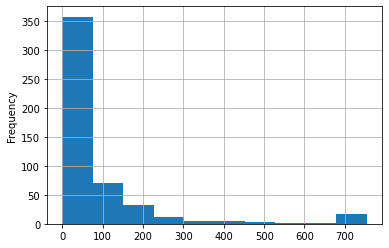

In [73]:
# Verificando a frequência dos erros
sse_series.plot( kind = 'hist' )
plt.grid(True)

Nota-se que a maioria dos erros são pequenos, o que indica que os dados se aproximam da média. O que poderá ser comprovado pelo teorema central do limite, já que quando o tamanho da amostra aumenta, a distribuição amostral da sua média se aproxima cada vez mais de uma distribuição normal.

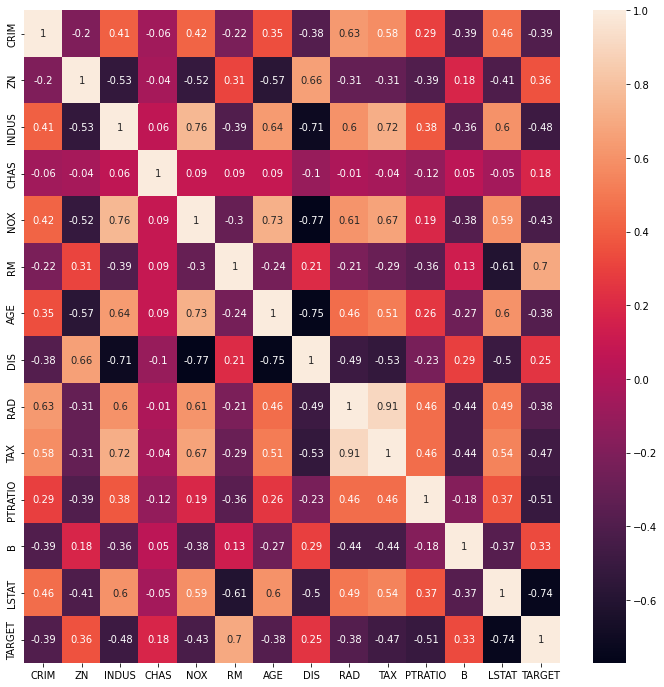

In [74]:
# Correlação entre as variáveis
import seaborn as sns

plt.figure( figsize = (12,12) )
sns.heatmap( df.corr().round(2), annot = True )

 ---

Realizando uma **regressão linear simples** para verificar se a variável 'LSTAT' (lower status of the population (percent)) tem correlação no preço da habitação.

In [75]:
# Desvio padrão da variável 'crim'
np.std(df['LSTAT'])

7.134001636650485

In [76]:
# Correlação
from scipy.stats.stats import pearsonr

pearsonr( df['LSTAT'], df['TARGET'] )[0]

-0.737662726174015

Ou seja, a variável LSTAT influencia negativamente a variável TARGET.

OBS: Porém, não é porque LSTAT acontece junto de TARGET que LSTAT cause TARGET (correlação e causalidade).

---

Construindo um modelo de regressão linear com o **StatsModels**

1. https://www.statsmodels.org/stable/index.html
2. https://www.statsmodels.org/stable/py-modindex.html

In [77]:
import statsmodels.api as sm

In [78]:
# Variáveis dependente e independente
X = df['LSTAT']
y = df['TARGET']

# O StatsModels requer uma matriz de entrada (variáveis explanatórias e os valores constantes)
# Os valores constantes são os coeficientes aprendidos durante o treinamento
# Por isso, precisamos adicionar os valores dos coeficientes à variável X
X = sm.add_constant(X)

X.head()

,const,LSTAT
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94
4,1.0,5.33


In [141]:
# Criação do modelo
regressao = sm.OLS( y, X )

# Treinamento do modelo
regressao_v1 = regressao.fit()

print( regressao_v1.summary() )
print('*'*78)
print('Estes são os parâmetros aprendidos durante o treinamento do modelo:')
print( regressao_v1.params )

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 30 Nov 2022   Prob (F-statistic):           2.49e-74
Time:                        22:00:49   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             9.1021      0.419     21.722      0.0

In [80]:
# Print da previsão dos dados
previsoes = regressao_v1.predict(X)
previsoes

0      29.822595
1      25.870390
2      30.725142
3      31.760696
4      29.490078
         ...    
501    25.366864
502    25.927393
503    29.195563
504    28.397521
505    27.067452
Length: 506, dtype: float64

In [81]:
# Passando a média de LSTAT como constante
# E adicionando a constante 1 para se tornar uma matriz
LM = np.mean( df['LSTAT'] ).round(1)
Xp = np.array( [1, LM] )

print(f'Para o caso em que LSTAT = {LM}, o modelo prevê que a mediana da taxa de ocupação é de {regressao_v1.predict(Xp).round(2)}')

Para o caso em que LSTAT = 12.7, o modelo prevê que a mediana da taxa de ocupação é de [22.49]


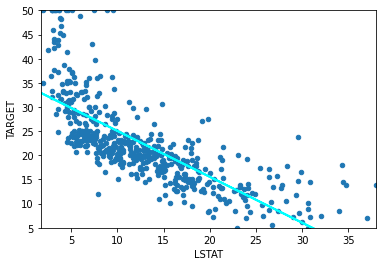

In [82]:
# Plots

X_range = [ df['LSTAT'].min(), df['LSTAT'].max() ]
y_range = [ df['TARGET'].min(), df['TARGET'].max() ]

# Scatter plot
scatter_regression = df.plot( kind = 'scatter', x = 'LSTAT', y = 'TARGET', xlim = X_range, ylim = y_range )

# Regression Line
previsoes = regressao_v1.predict(X)
regression_line = scatter_regression.plot( df['LSTAT'], previsoes, color = 'cyan', linewidth = 2 )

---
Calculando os **resíduos**

In [83]:
previsoes = regressao_v1.predict(X)

# Residuos
residuos = df['TARGET'] - previsoes

In [84]:
residuos

0      -5.822595
1      -4.270390
2       3.974858
3       1.639304
4       6.709922
         ...    
501    -2.966864
502    -5.327393
503    -5.295563
504    -6.397521
505   -15.167452
Length: 506, dtype: float64

In [85]:
residuos.describe().round(2)

count    506.00
mean       0.00
std        6.21
min      -15.17
25%       -3.99
50%       -1.32
75%        2.03
max       24.50
dtype: float64

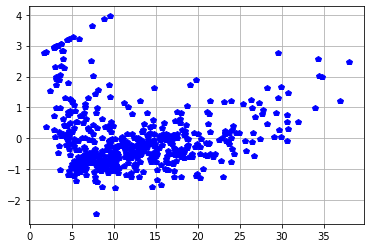

In [86]:
# Normalizando os dados para plotagem
residuos_normalized = (residuos - np.mean(residuos)) / np.std(residuos)

# Plot
residual_scatter_plot = plt.plot( df['LSTAT'], residuos_normalized, 'bp' )
plt.grid()

---
Modelo de **Regressão Linear Simples com Scikit-Learn** 

>um pacote melhor para a linguagem Python do que StatsModels.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html


In [87]:
from sklearn import linear_model

In [88]:
# O Scikit learn requer os dados em forma de matriz (por isso do reshape) e não em forma de vetor
X = df['LSTAT'].values.reshape(( len(df), 1 ))    # matriz len(df) vs 1
y = df['TARGET'].values    # a variável target pode ser um vetor

In [89]:
# Criando o objeto
regressao_skl = linear_model.LinearRegression( normalize = False, fit_intercept = True ) # fit_intercep retorna todos os parâmetros aprendidos durante o treinamento

# Treinamento
regressao_skl.fit(X, y)

LinearRegression(normalize=False)

In [90]:
# Mostrando os coeficientes aprendidos: coef e intercept (que são os coeficientes de regressão linear simples)
print( regressao_skl.coef_ )
print( regressao_skl.intercept_ )

[-0.95004935]
34.5538408793831


In [91]:
# Valores preditos
pred_reg_skl = regressao_skl.predict(X)

In [92]:
# Passando a média de LSTAT como constante
# E adicionando a constante 1 para se tornar uma matriz
LM = np.mean( df['LSTAT'] ).round(1)
Xp = np.array( LM ).reshape(-1, 1)

print(f'Para o caso em que LSTAT = {LM}, o modelo prevê que a mediana da taxa de ocupação é de {regressao_skl.predict(Xp).round(2)}')

Para o caso em que LSTAT = 12.7, o modelo prevê que a mediana da taxa de ocupação é de [22.49]


In [93]:
Xp

array([[12.7]])

---
Em termos de comparação entre StatsModels e Scikit-Learn:

```python
# sklearn
from sklearn import linear_model
linear_regression_sk = linear_model.LinearRegression( normalize = False, fit_intercept = True)
linear_regression_sk.fit( X, y )
linear_regression_sk.predict( new_X ) 
```

```python
# StatsModels
import statsmodels.api as sm
linear_regression_sm = sm.OLS( y, sm.add_constant(X) )
linear_regression_sm.fit()
linear_regression_sm.predict( new_x )
```

>Em termos de velocidade, o Sk Learn é mais eficiente.

>Em termos de interpretação estatística, o StatsModels mostra-se mais claro.

---
Métodos de minimização da Cost Function (função que calcula o erro):

Ex.
- Pseudo-inversão
- Fatorização
- Gradiente Descendente

Relembrando as métricas de avaliação dos erros:

<img src="https://4.bp.blogspot.com/-wG7IbjTfE6k/XGUvqm7TCVI/AAAAAAAAAZU/vpH1kuKTIooKTcVlnm1EVRCXLVZM9cPNgCLcBGAs/s1600/formula-MAE-MSE-RMSE-RSquared.JPG">

Vale lembrar que ao elevarmos ao quadrado ou usarmos módulo, evitamos que os erros positivos (ex. +10) compense o erro negativo (-10), e vice versa.

> Em geral, preferimos o 'erro ao quadrado' ao invés do erro absoluto, pois com a diferença ao quadrado, temos a minimização mais próxima da média, diferente da 'diferença absoluta' em que a otimização se aproxima da mediana. Porém, caso haja outliers na base de dados, a média seria afetada.

---
<h3>Minimizando a cost function com Pseudo Inversão</h3>

<img src="https://res.cloudinary.com/dyd911kmh/image/upload/v1633656949/moore-penrose-pseudoinverse-matrix_vrmr0j.png">

In [94]:
# Transformando LSTAT em formato de matriz
X = df['LSTAT'].values.reshape(( len(df), 1 ))
# Adicionando a coluna de "1's" em X  
Xb = np.column_stack(( X, np.ones( len(df) ) ))
# Vetor da variável target
y = df['TARGET'].values

In [95]:
# Resolvendo a equação utilizando numpy
np.linalg.solve( np.dot(Xb.T, Xb), np.dot(Xb.T, y) )

array([-0.95004935, 34.55384088])

---
<h3>Minimizando a cost function com **Gradient Descent**</h3>

* Melhor opção na maioria dos casos

No começo, precisamos **inicilizar** os valores dos coeficientes, para que o algoritmo possa "caminhar" rumo ao local com o menor erro.<br>
Também precisaremos fornecer o tamanho da "**passada**" da "caminhada", ou velocidade de treinamento. Caso a passada seja muito pequena, corremos o risco de ficarmos em um local de platô ou mínimo local. Se a passada for muito grande, podemos pular o local ideal.<br>
Por fim, o cálculo (**gradiente**) da diferença entre a passada anterior e a passada atual atualizará os coeficientes na próxima passada, a fim de **minimizar os erros**. Se essa nova passada for algo bom, o coeficiente é atualizado.

<img src="https://miro.medium.com/max/1400/1*tQTcGTLZqnI5rp3JYO_4NA.png">

Calculando o gradiente descendente utilizando Python:

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20200611183120/1406-7.png">

- Precisamos encontrar os melhores pesos/coeficientes (theta)
- Alpha é o valor da taxa de aprendizado

In [131]:
# Definindo x e y

X = df['RM'].values.reshape(( len(df), 1 )) 
X = np.column_stack(( X,np.ones( len(df) ) )) 
y = df['TARGET'].values 

In [132]:
# Random init
import random
def rand_init( w ):
  return np.array( [np.random.normal() for peso in range(w)] )

# Valores aproximados para X e y
def hypothesis( X, w ):
  return np.dot( X, w )

# Lost function
def loss_func( X, w, y ):
  return hypothesis( X, w ) - y

# Squared Loss
def squared_loss( X, w, y ):
  return loss_func( X, w, y ) ** 2

# Cálculo gradient
def gradient( X, w, y ):
  gradients = list()
  for peso in range( len(w) ):
    gradients.append( np.sum( loss_func( X, w, y ) * X[:, peso] ) / float(len(y)) )
  return gradients

# Update dos coeficientes
def update(X,w,y, alpha = 0.01):
    return [t - alpha*g for t, g in zip(w, gradient(X,w,y))]

# Otimização do modelo
def optimize( X, y, alpha = 0.01, eta = 10 ** -12, iterations = 1000 ):
    w = rand_init( X.shape[1] )
    path = list()
    for k in range(iterations):
        SSL = np.sum( squared_loss( X, w, y ) )
        new_w = update( X, w, y, alpha = alpha )
        new_SSL = np.sum( squared_loss( X, new_w, y ) )
        w = new_w
        if k >= 5 and ( new_SSL - SSL <= eta and new_SSL - SSL >= -eta ):
            path.append(new_SSL)
            return w, path
        if k % ( iterations / 20 ) == 0:
            path.append( new_SSL )
    return w, path

In [134]:
# Definindo o valor de alfa
# Alfa é chamado de taxa de aprendizagem
alpha = 0.005

# Otimizando a Cost Function
w, path = optimize( X, y, alpha, eta = 10**-12, iterations = 50000 )

In [135]:
# Imprimindo o resultado
print(f'Valor dos Coeficientes ao final do treino {w}')

Valor dos Coeficientes ao final do treino [8.830965798969354, -32.94584699687458]


In [139]:
# Imprimindo o resultado
print(f'Caminho do Gradiente mostrando o erro ao quadrado\n{path}')

Caminho do Gradiente mostrando o erro ao quadrado
[79685.39537180265, 27667.507172348865, 26212.14227014633, 25134.627451392018, 24336.86313614842, 23746.218913350778, 23308.921090850767, 22985.157007190603, 22745.450389698137, 22567.97776265408, 22436.581584778814, 22339.299227224346, 22267.27386663633, 22213.948138331165, 22174.467137804957, 22145.236418373795, 22123.594743971553, 22107.571803720773, 22095.708830019743, 22086.925788778335]
